In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# afficher les dataframes complets
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_2015 = pd.read_csv('Datas/2015-building-energy-benchmarking.csv')
df_2016 = pd.read_csv('Datas/2016-building-energy-benchmarking.csv')

In [4]:
df_2015.shape

(3340, 42)

In [5]:
df_2016.shape

(3376, 46)

In [6]:
df_2016.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Text(0.5, 1.0, 'Complétude du jeu de données 2016')

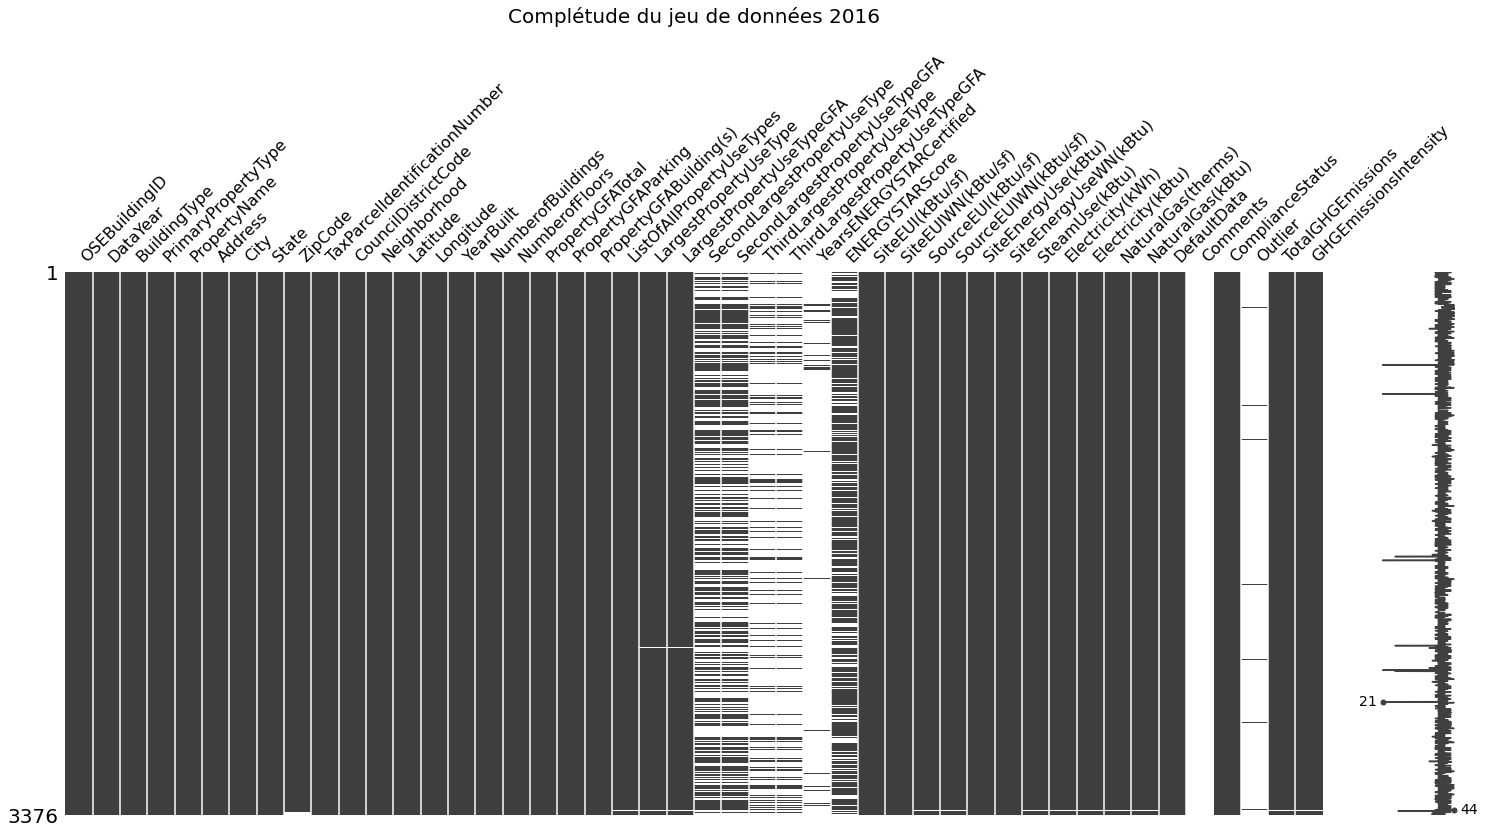

In [7]:
import missingno as msno

msno.matrix(df_2016)
plt.title('Complétude du jeu de données 2016', pad=30, size=20)

In [8]:
df_2016[['OSEBuildingID', 'DataYear', 'PrimaryPropertyType', 'PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']].head(1)

,OSEBuildingID,DataYear,PrimaryPropertyType,PropertyGFATotal,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,Hotel,88434,7226362.5,81.699997,249.98,2.83


On remarque que les deux dataframes d'ont pas le même format

# Homogénéisation du format des deux datasets

La colonne OSEBuldingID semble être une clé primaire pour ce df.

In [9]:
print('df_2015:')
print('Valeurs uniques pour la colonne \'OSEBuildingID\': ',len(df_2015.OSEBuildingID.unique()))
print('Longueur de la colonne: ', df_2015.shape[0])

print('df_2016:')
print('Valeurs uniques pour la colonne \'OSEBuildingID\': ',len(df_2016.OSEBuildingID.unique()))
print('Longueur de la colonne: ', df_2016.shape[0])

df_2015:
Valeurs uniques pour la colonne 'OSEBuildingID':  3340
Longueur de la colonne:  3340
df_2016:
Valeurs uniques pour la colonne 'OSEBuildingID':  3376
Longueur de la colonne:  3376


In [10]:
ose_2015 = df_2015[~df_2015.OSEBuildingID.isin(list(df_2016.OSEBuildingID.values))]
print('Il y a ', len(ose_2015) ,'ID présentes dans le df 2015 et absentes du df 2016\n')
ose_2016 = df_2016[~df_2016.OSEBuildingID.isin(list(df_2015.OSEBuildingID.values))]
print('Il y a ', len(ose_2016) ,'ID présentes dans le df 2016 et absentes du df 2015\n')
ose_comm = df_2016[df_2016.OSEBuildingID.isin(list(df_2015.OSEBuildingID.values))]
print('Il y a ', len(ose_comm) ,'ID communes aux deux df\n')

Il y a  56 ID présentes dans le df 2015 et absentes du df 2016

Il y a  92 ID présentes dans le df 2016 et absentes du df 2015

Il y a  3284 ID communes aux deux df



Les échantillons présents dans un df et absents de l'autre représente moins de 3% des échantillons totaux.
On les supprime.

In [11]:
ose_2015 = df_2015[df_2015.OSEBuildingID.isin(list(df_2016.OSEBuildingID.values))]
ose_2016 = df_2016[df_2016.OSEBuildingID.isin(list(df_2015.OSEBuildingID.values))]

In [12]:
print('Format du df 2015 : ', ose_2015.shape)
print('Format du df 2016 : ', ose_2016.shape)

Format du df 2015 :  (3284, 42)
Format du df 2016 :  (3284, 46)


In [13]:
print('Les colonnes présentes dans le df 2015 et absentes du df 2016 sont: \n')
for col in ose_2015.columns:
    if col not in list(ose_2016.columns):
        print(col)

Les colonnes présentes dans le df 2015 et absentes du df 2016 sont: 

Location
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment


In [14]:
print('Les colonnes présente dans le df 2016 et absentes du df 2015 sont: \n')
for col in ose_2016.columns:
    if col not in list(ose_2015.columns):
        print(col)

Les colonnes présente dans le df 2016 et absentes du df 2015 sont: 

Address
City
State
ZipCode
Latitude
Longitude
Comments
TotalGHGEmissions
GHGEmissionsIntensity


- On voit que les colonnes : Adress, City, State, ZipCode, Latitude et Longitude du df_2016 sont assimilables
    à la colonne Location du df_2015
- Comment (2016) correspond à Comments (2015)
- GHGEmissionsIntensity (2016) correspond à GHGEmissionsIntensity(kgCO2e/ft2) (2015)
- TotalGHGEmissions (2016) correspond à GHGEmissions(MetricTonsCO2e) (2015)
- La colonne OtherFuelUse(kBtu) (2015) est la seule colonne sans correspondace 

Opérations de nettoyage:
    - on décide de conserver les colonnes City, State, ZipCode Latitude et Longitude pour les deux df
    - on renomme la colonne "Comments"(2015) en "Comment"
    - on renomme GHGEmissionsIntensity(kgCO2e/ft2) (2015) en GHGEmissionsIntensity
    - on supprimre la colonne OtherFuelUse(kBtu) (2015), c'est une énergie et elle ne peut donc pas rentrer
        en compte dans le calcul des émissions GHG

In [15]:
ose_2015 = ose_2015.sort_values(by='OSEBuildingID', ignore_index=True)
ose_2016 = ose_2016.sort_values(by='OSEBuildingID', ignore_index=True)

In [16]:
ose_2015['City'], ose_2015['State'], ose_2015['ZipCode'], ose_2015['Latitude'], ose_2015['Longitude'] =\
ose_2016['City'], ose_2016['State'], ose_2016['ZipCode'], ose_2016['Latitude'], ose_2016['Longitude']

In [17]:
ose_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',\
                         'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',\
                         'Comments':'Comment'}, inplace=True)

In [18]:
ose_2015.drop(labels=['OtherFuelUse(kBtu)', 'Location'], axis=1, inplace=True)
ose_2016.drop(labels=['Address'], axis=1, inplace=True)

In [19]:
print('Format du df 2015 : ', ose_2015.shape)
print('Format du df 2016 : ', ose_2016.shape)

Format du df 2015 :  (3284, 45)
Format du df 2016 :  (3284, 45)


Les deux dataframes possèdent maintenant le même nombre de colonne et celles-ci sont identiques.

Les deux df sont maintenant au même format, nous pouvons commencer les études descriptives.

# Etude univariée du df 2016

In [20]:
ose_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3284 non-null   int64  
 1   DataYear                         3284 non-null   int64  
 2   BuildingType                     3284 non-null   object 
 3   PrimaryPropertyType              3284 non-null   object 
 4   PropertyName                     3284 non-null   object 
 5   City                             3284 non-null   object 
 6   State                            3284 non-null   object 
 7   ZipCode                          3284 non-null   float64
 8   TaxParcelIdentificationNumber    3284 non-null   object 
 9   CouncilDistrictCode              3284 non-null   int64  
 10  Neighborhood                     3284 non-null   object 
 11  Latitude                         3284 non-null   float64
 12  Longitude           

Le df se décompose en deux parties principales :

    - les informations descriptives de nos échantillons : surface totale, nombre d'étages, localisation ...
        Ce sont les inputs des modèles
    
    - les informations liées à la consommation des bâtiments : consommation de gas, d'électricité ...
        Ce sont les outputs des modèles
        
On peut également classer chaque colonne, selon qu'elle soit ordinale ou nominale.


Pour les outputs, on choisit de ne garder que les unités kBtu pour l'uniformité des claculs.

In [21]:
ose_2016.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.6122,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.5,189.0,7226362.5,7456910.0,2003882.0,1156514.25,3946027.0,12764.5293,1276453.0,False,NaN,Compliant,NaN,249.98,2.83


# Etude univariée

In [22]:
inputs_nominal = ['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood',\
                  'LargestPropertyUseType', 'SecondLargestPropertyUseType',\
                  'ThirdLargestPropertyUseType']
inputs_ordinal = ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',\
                 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',\
                 'ThirdLargestPropertyUseTypeGFA']

outputs_ordinal = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',\
                   'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',\
                  'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [23]:
def plot_columns(df, inputs_ordinal, inputs_nominal, outputs_ordinal, outputs_nominal=None):
    
    print("Présentation des inputs de type Ordinal :\n\n")
    
    for col in inputs_ordinal:

        if 'GFA' in col:

            plt.figure(figsize=(20,5))
            plt.title("Distribution des valeurs principales de la colonne : "+col)
            samp = ose_2016[col].copy()
            samp = samp-samp%100000 + 100000
            samp = samp.value_counts()
            samp = samp.sort_index()
            plt.bar([str(i) for i in samp.index], samp.values, log=True)
            plt.xlabel(col)
            plt.ylabel('Nombre d\'échantillons (log)')
            plt.show()

        else:

            plt.figure(figsize=(20,5))
            plt.title("Distribution des valeurs de la colonne : "+col)
            samp = df[col].value_counts()
            plt.bar(samp.index, samp.values, log=True)
            plt.xlabel(col)
            plt.ylabel('Nombre d\'échantillons (log)')
            plt.show()
            
    print("Présentation des inputs de type Nominal :\n\n")

    for col in inputs_nominal:

        plt.figure(figsize=(20,5))
        plt.title("Distribution des valeurs principales de la colonne : "+col)
        samp = ose_2016[col].value_counts().head(8)
        plt.bar(samp.index, samp.values)
        plt.xlabel(col)
        plt.ylabel('Nombre d\'échantillons (log)')
        plt.show()
        
    print("Présentation des outputs de type Ordinal :\n\n")

    for col in outputs_ordinal:
        plt.figure(figsize=(20,5))
        plt.title("Distribution des valeurs de la colonne : "+col)
        plt.hist(df[col], bins=100)
        plt.yscale('log')
        plt.xlabel(col)
        plt.ylabel('Nombre d\'échantillons (log)')
        plt.show()

Présentation des inputs de type Ordinal :




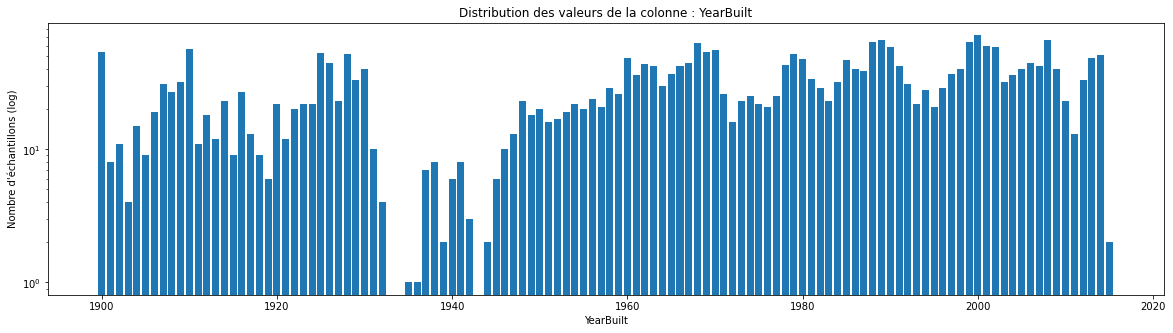

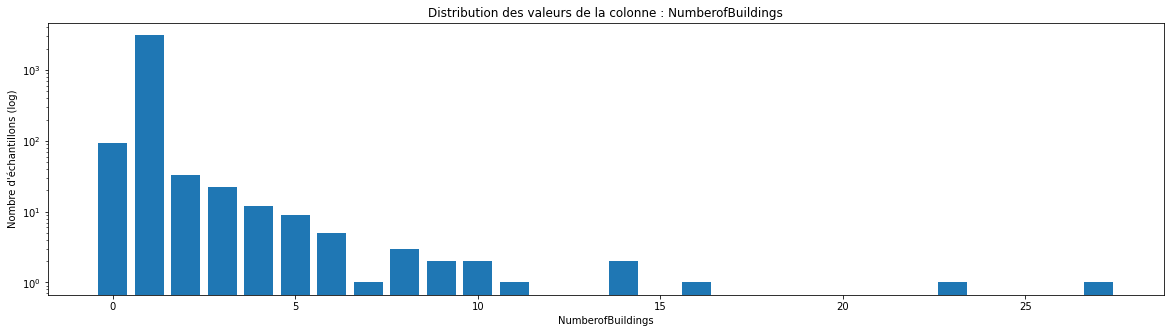

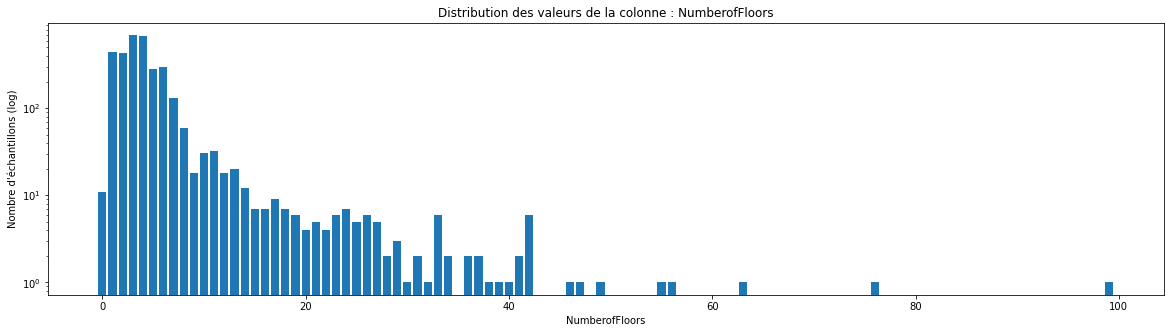

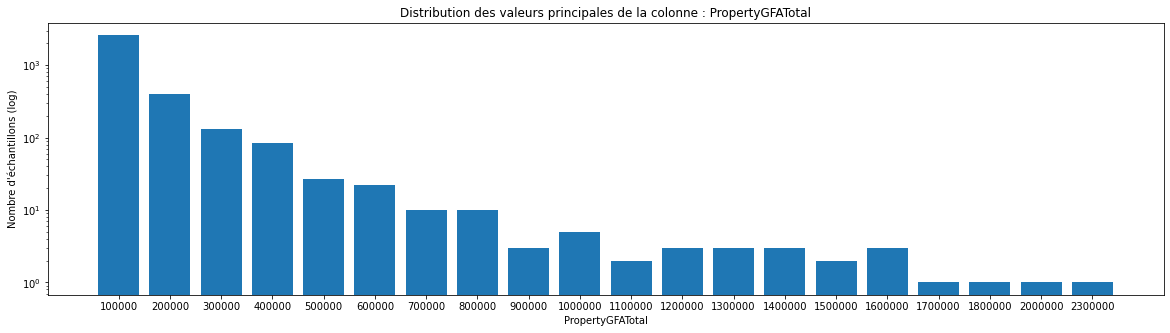

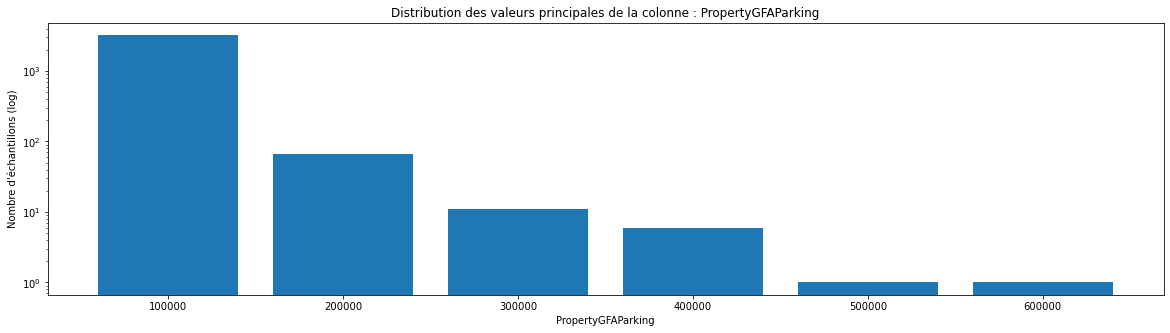

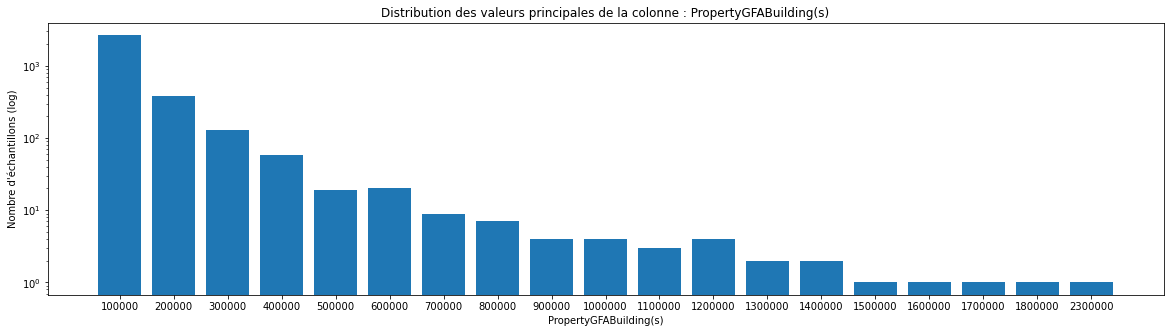

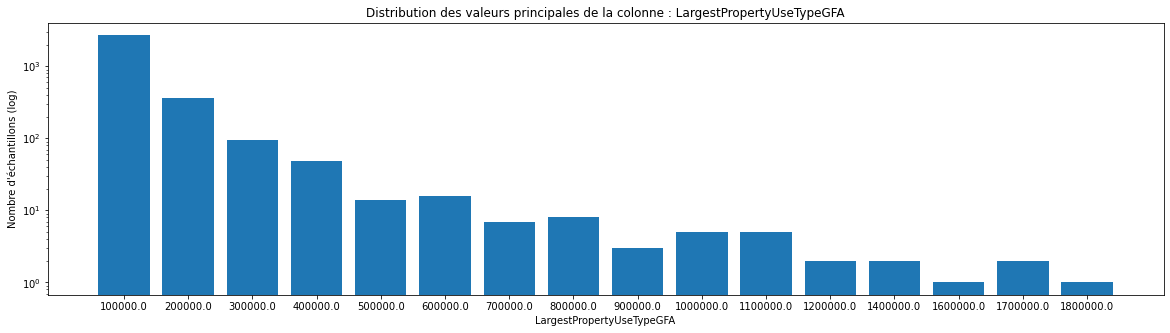

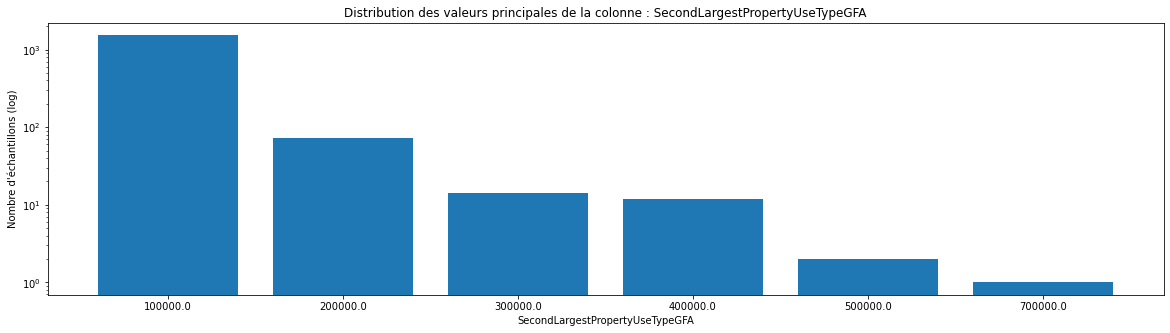

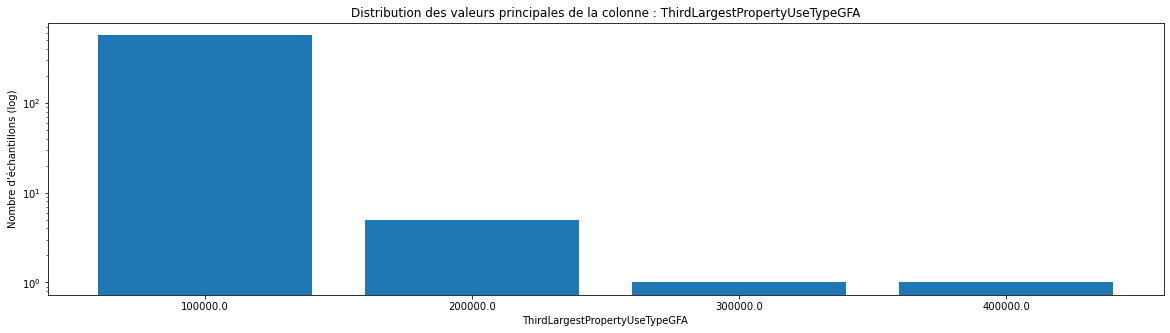

Présentation des inputs de type Nominal :




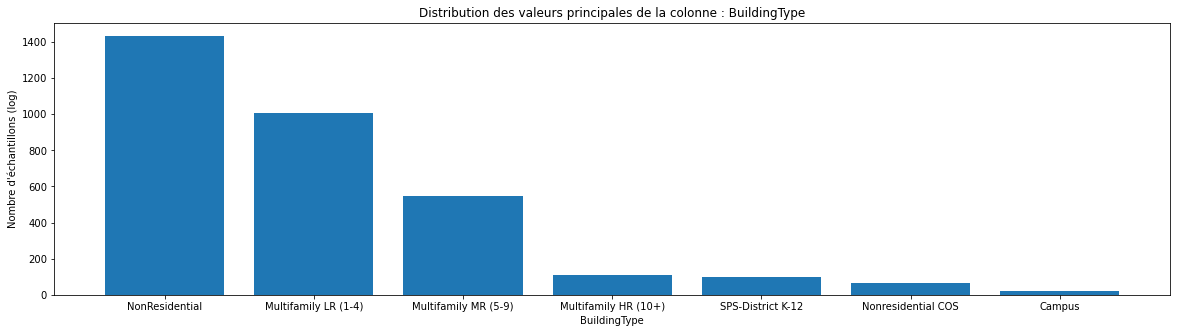

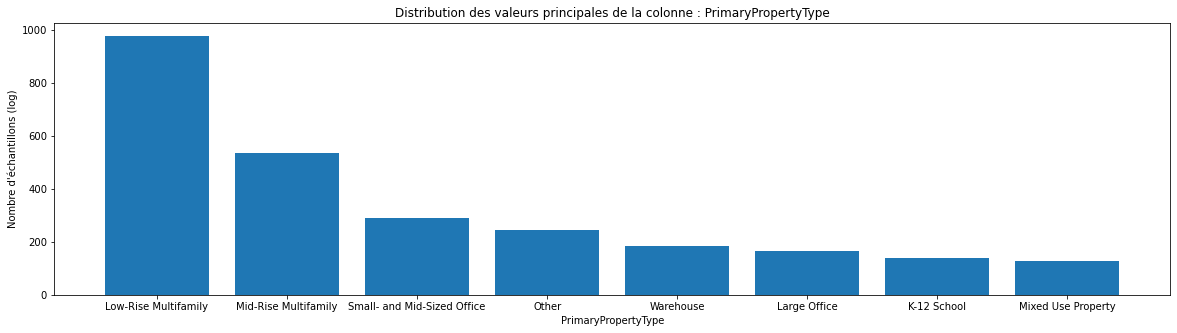

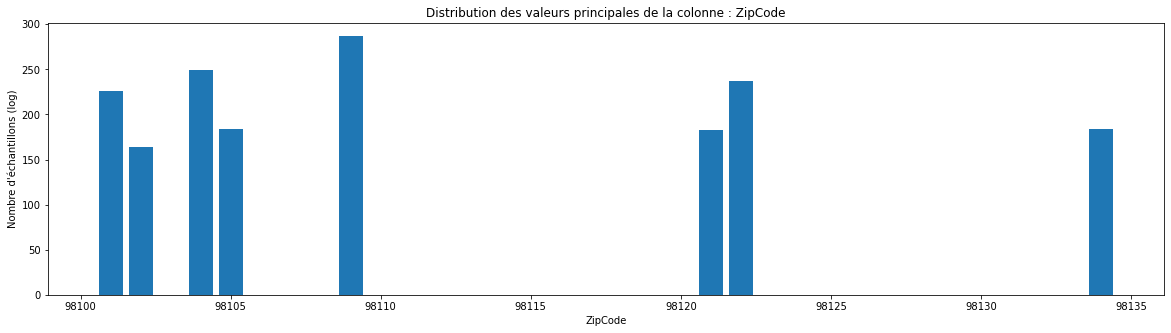

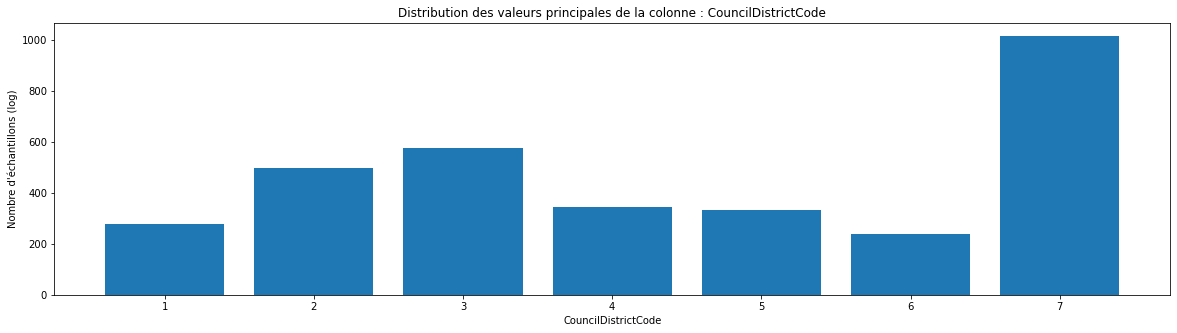

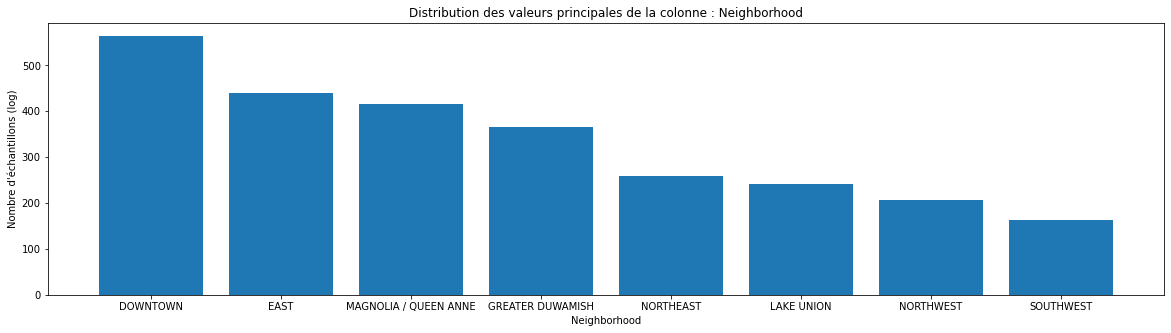

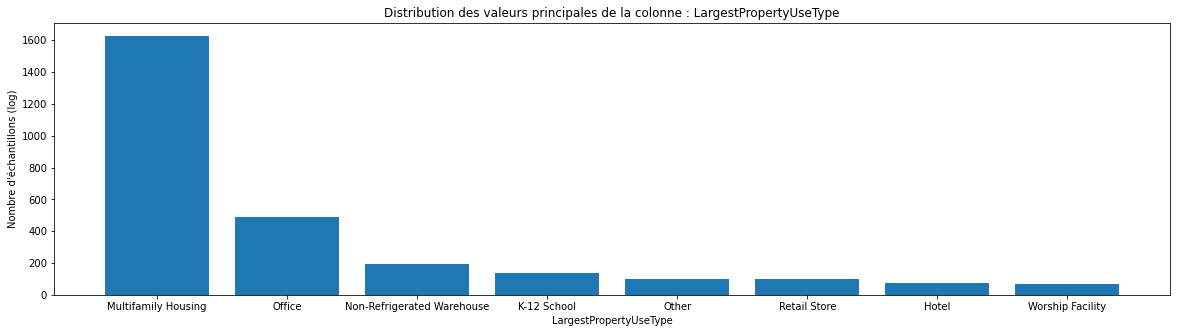

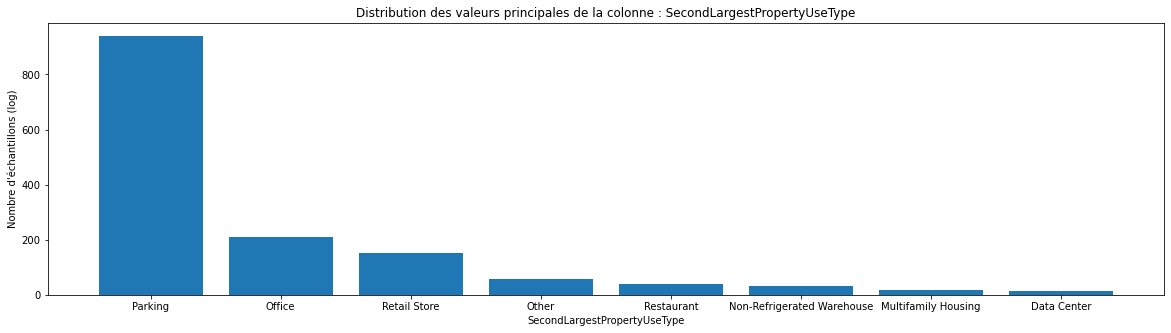

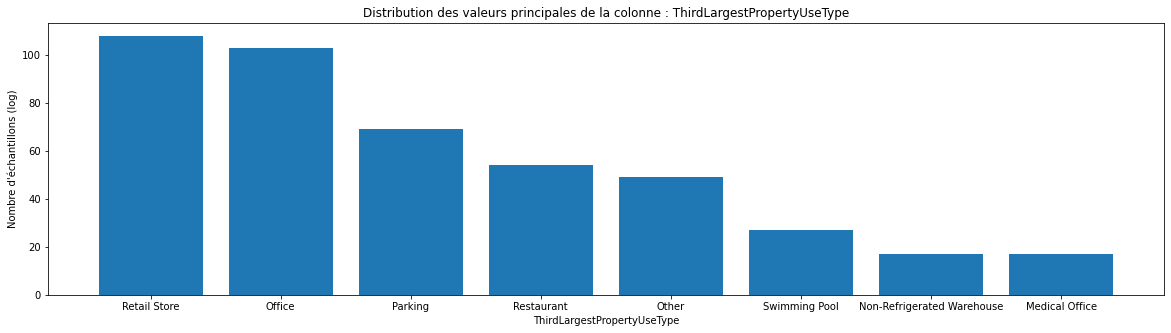

Présentation des outputs de type Ordinal :




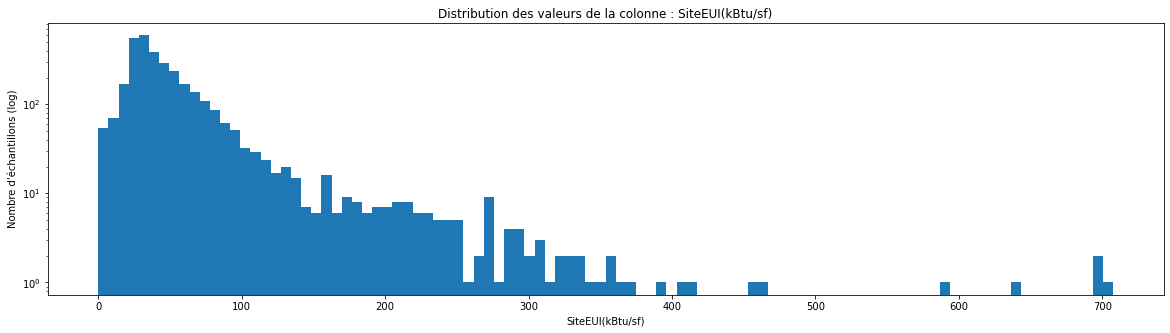

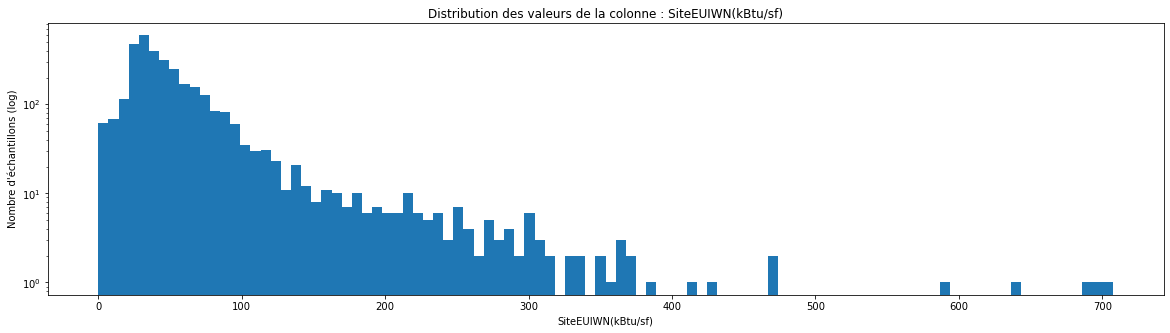

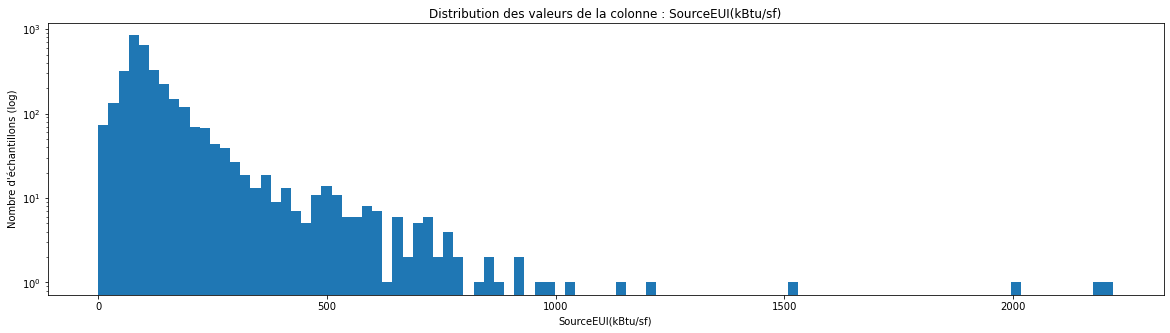

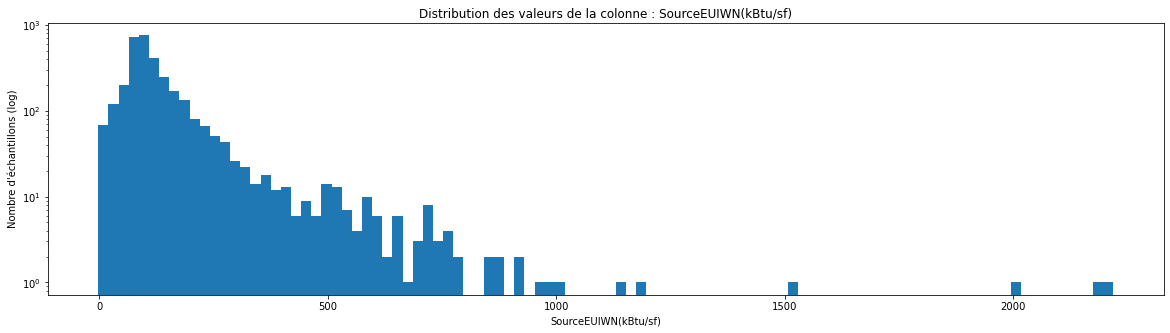

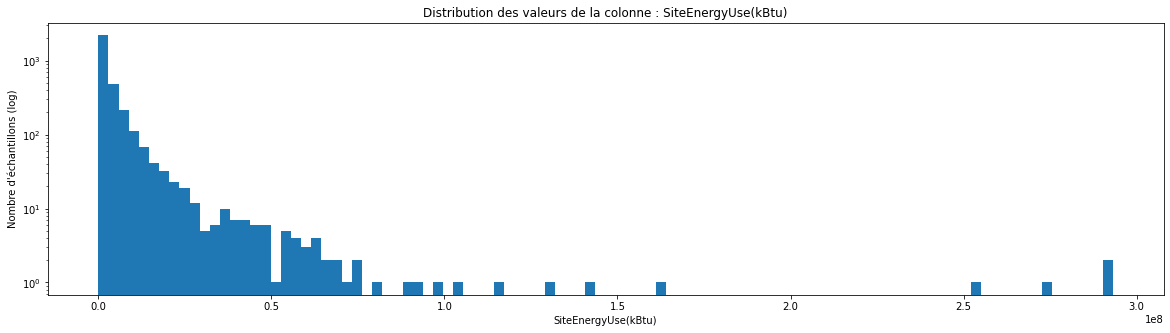

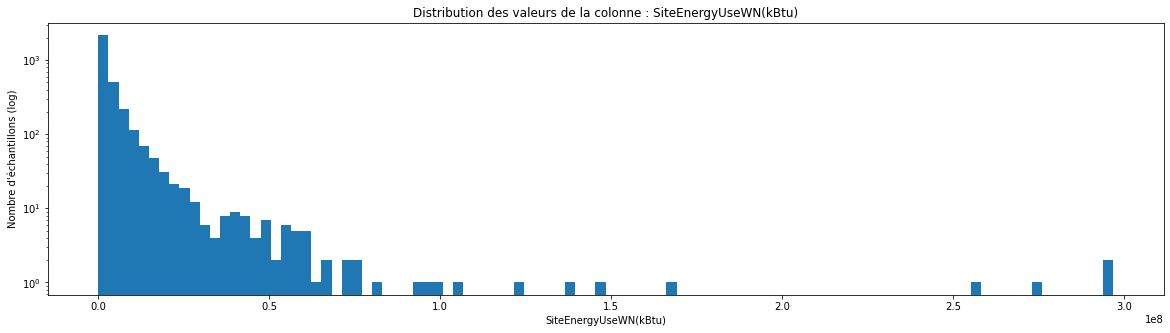

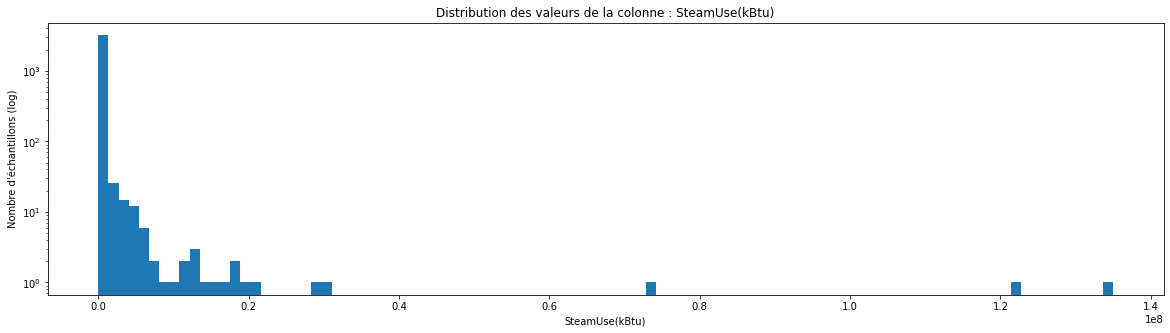

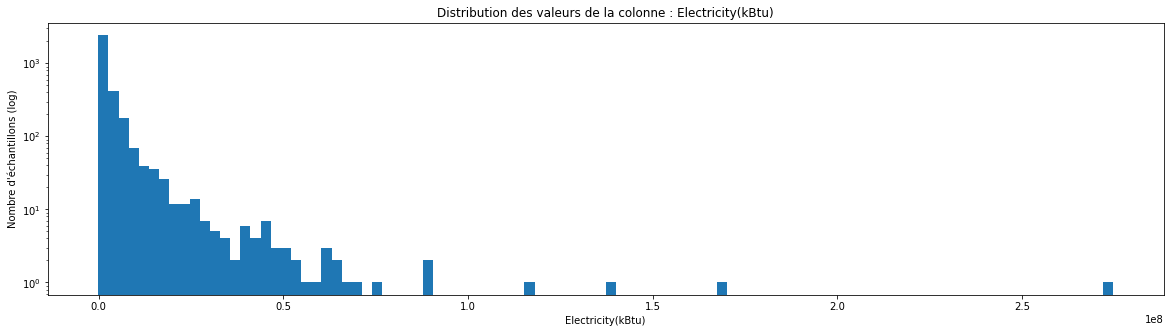

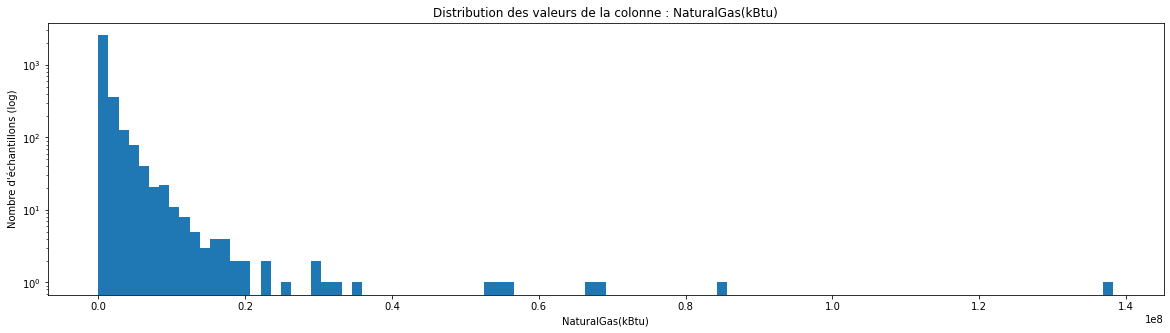

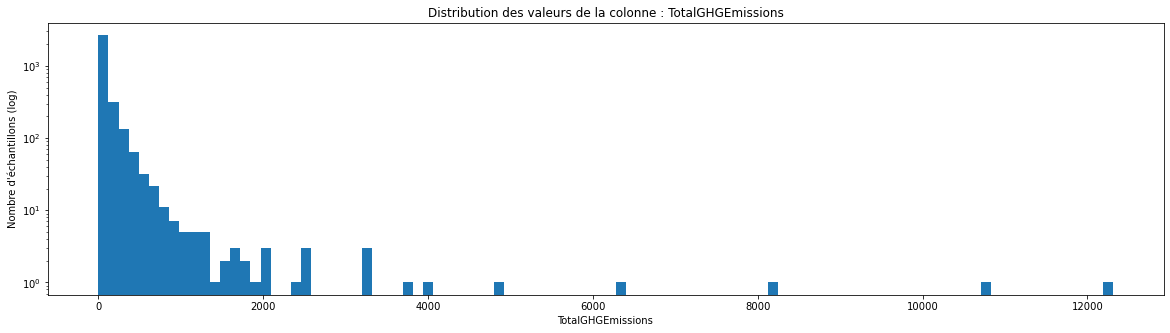

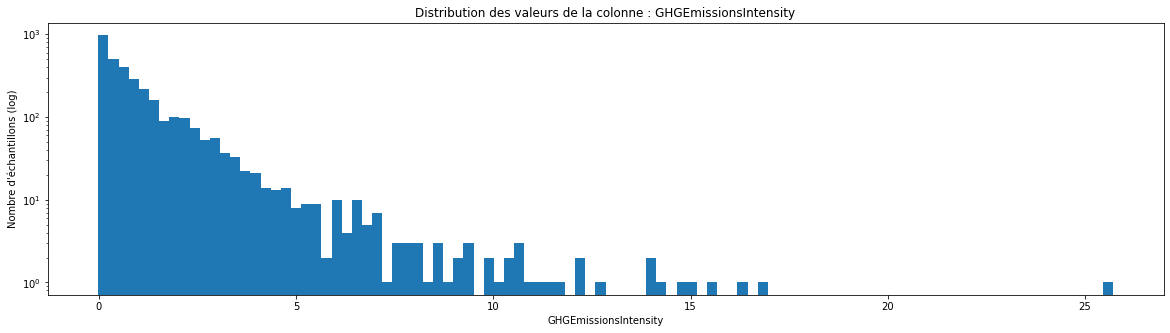

In [24]:
plot_columns(ose_2016,inputs_ordinal, inputs_nominal, outputs_ordinal)

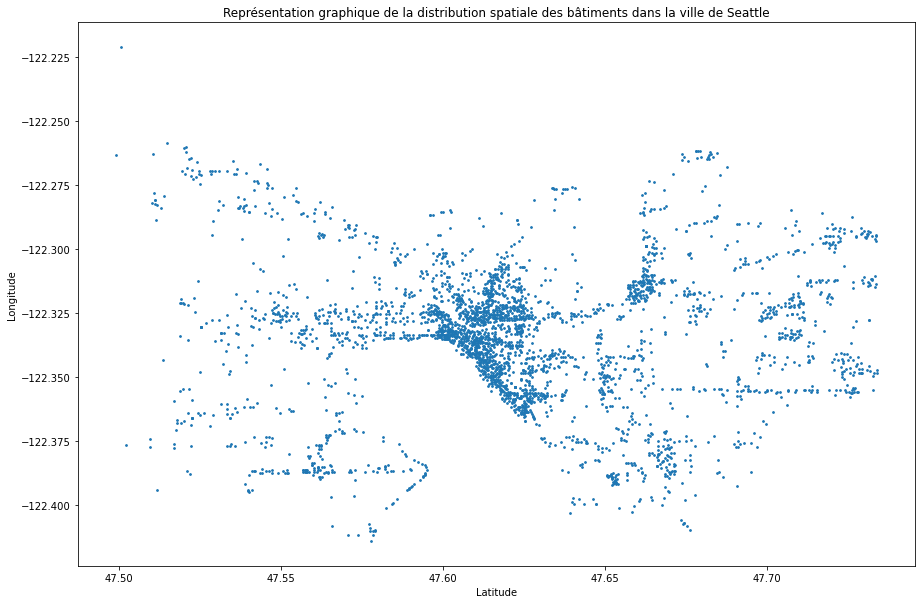

In [25]:
plt.figure(figsize=(15,10))
plt.title("Représentation graphique de la distribution spatiale des bâtiments dans la ville de Seattle")
plt.scatter(ose_2016.Latitude, ose_2016.Longitude, s=3)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

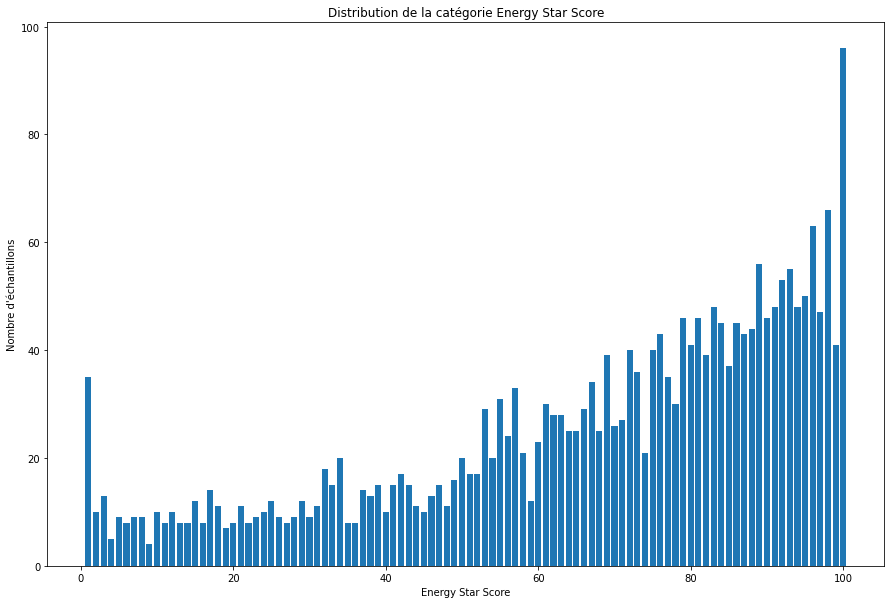

In [26]:
# Distribution de la catégorie Energy Star Score
plt.figure(figsize=(15,10))
plt.title("Distribution de la catégorie Energy Star Score")
temp = ose_2016.ENERGYSTARScore.value_counts().sort_index()
plt.bar(temp.index, temp.values)
plt.xlabel("Energy Star Score")
plt.ylabel("Nombre d\'échantillons")
plt.show()

In [27]:
ose_2016[ose_2016['NumberofBuildings'] > 10][['NumberofBuildings', 'PrimaryPropertyType']].sample(5)

,NumberofBuildings,PrimaryPropertyType
104,27.0,University
126,11.0,University
1849,23.0,Other
2311,14.0,University
1182,16.0,Low-Rise Multifamily


In [28]:
ose_2016[ose_2016['PropertyGFATotal'] > 1000000][['PropertyGFATotal', 'PrimaryPropertyType']].sample(5)

,PropertyGFATotal,PrimaryPropertyType
156,1172127,Other
228,1123435,Large Office
1285,1256335,High-Rise Multifamily
268,1400000,Large Office
153,1585960,Other


In [29]:
ose_2016[ose_2016['SiteEUI(kBtu/sf)'] > 100][['SiteEUI(kBtu/sf)', 'PrimaryPropertyType']].sample(5)

,SiteEUI(kBtu/sf),PrimaryPropertyType
2371,116.400001,Small- and Mid-Sized Office
2430,115.800003,Other
559,106.099999,Retail Store
616,133.399994,Hotel
1226,162.100006,Other


In [30]:
ose_2016[ose_2016['SiteEnergyUse(kBtu)'] > 1.5e8][['SiteEnergyUse(kBtu)', 'PrimaryPropertyType']].sample(5)

,SiteEnergyUse(kBtu),PrimaryPropertyType
550,274682208.0,Other
168,293090784.0,Hospital
3249,163945984.0,Hospital
610,291614432.0,Hospital
122,253832464.0,Hospital


In [31]:
ose_2016[~ose_2016.Outlier.isna()].sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
828,19934,2016,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,Seattle,WA,98102.0,0704600000,3,EAST,47.62059,-122.32440,1989,1.0,4,31702,0,31702,"Multifamily Housing, Parking",Multifamily Housing,26418.0,Parking,14280.0,NaN,NaN,NaN,NaN,9.700000,10.400000,30.400000,32.700001,2.559712e+05,275412.0,0.0,7.502090e+04,255971.0,0.00000,0.0,False,NaN,Non-Compliant,Low outlier,1.78,0.06
2851,27245,2016,Multifamily LR (1-4),Low-Rise Multifamily,St. Johns Apartments,Seattle,WA,98122.0,7502500061,3,EAST,47.61390,-122.32241,1910,1.0,3,24682,0,24682,"Multifamily Housing, Retail Store",Multifamily Housing,17822.0,Retail Store,6085.0,NaN,NaN,NaN,74.0,112.199997,113.400001,205.399994,206.699997,2.681771e+06,2710595.0,0.0,2.937813e+05,1002382.0,16793.89063,1679389.0,False,NaN,Non-Compliant,High outlier,96.18,3.90
2910,27526,2016,Multifamily LR (1-4),Low-Rise Multifamily,Vali Hai,Seattle,WA,98112.0,5457300300,7,MAGNOLIA / QUEEN ANNE,47.62670,-122.35506,1959,2.0,4,43346,0,43346,"Multifamily Housing, Parking, Swimming Pool",Multifamily Housing,43346.0,Parking,12600.0,Swimming Pool,0.0,NaN,5.0,104.300003,111.900001,205.600006,216.100006,4.519115e+06,4850560.0,0.0,5.843347e+05,1993750.0,25253.65039,2525365.0,False,NaN,Non-Compliant,High outlier,148.02,3.41
225,350,2016,NonResidential,Large Office,Second And Spring Building,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.500000,4.139950e+07,41650404.0,0.0,1.166315e+07,39794668.0,16048.30957,1604831.0,False,NaN,Non-Compliant,High outlier,362.66,2.10
1284,21474,2016,NonResidential,Other,The Lusty Lady,Seattle,WA,98101.0,1976200060,7,DOWNTOWN,47.60711,-122.33886,1900,1.0,3,49760,0,49760,Other,Other,24019.0,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,1.800000,5.800000,5.800000,4.429350e+04,44293.5,0.0,1.298170e+04,44294.0,0.00000,0.0,False,NaN,Non-Compliant,Low outlier,0.31,0.01


In [32]:
comp = pd.Series(index=inputs_ordinal+outputs_ordinal, dtype=np.float64)

for col in inputs_ordinal+outputs_ordinal:
    temp = pd.DataFrame()
    temp['2015'] = ose_2015[col]
    temp['2016'] = ose_2016[col]
    comp[col] = temp.corr().at['2015', '2016']

Text(0, 0.5, 'Coefficient de corrélation')

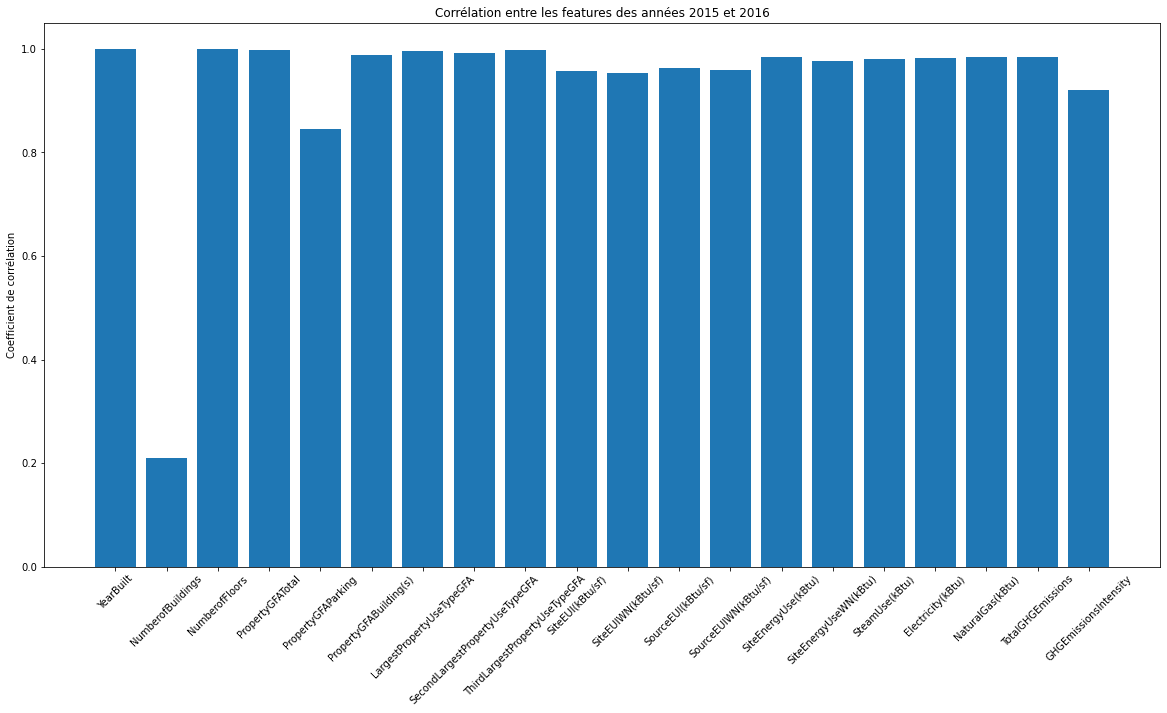

In [33]:
plt.figure(figsize=(20,10))
plt.title("Corrélation entre les features des années 2015 et 2016")
plt.bar(comp.index, comp.values)
plt.xticks(rotation=45)
plt.ylabel("Coefficient de corrélation")

In [34]:
comp

YearBuilt                          1.000000
NumberofBuildings                  0.209709
NumberofFloors                     1.000000
PropertyGFATotal                   0.997450
PropertyGFAParking                 0.845745
PropertyGFABuilding(s)             0.988778
LargestPropertyUseTypeGFA          0.996258
SecondLargestPropertyUseTypeGFA    0.991879
ThirdLargestPropertyUseTypeGFA     0.998624
SiteEUI(kBtu/sf)                   0.956918
SiteEUIWN(kBtu/sf)                 0.953054
SourceEUI(kBtu/sf)                 0.962588
SourceEUIWN(kBtu/sf)               0.958408
SiteEnergyUse(kBtu)                0.983516
SiteEnergyUseWN(kBtu)              0.976676
SteamUse(kBtu)                     0.981179
Electricity(kBtu)                  0.983006
NaturalGas(kBtu)                   0.984649
TotalGHGEmissions                  0.983772
GHGEmissionsIntensity              0.921148
dtype: float64

In [35]:
ose_2015.NumberofBuildings.value_counts()

1     3266
2        5
3        3
6        3
7        2
39       1
11       1
16       1
10       1
4        1
Name: NumberofBuildings, dtype: int64

In [36]:
ose_2016.NumberofBuildings.value_counts()

1.0     3090
0.0       92
2.0       33
3.0       22
4.0       12
5.0        9
6.0        5
8.0        3
10.0       2
9.0        2
14.0       2
23.0       1
16.0       1
7.0        1
11.0       1
27.0       1
Name: NumberofBuildings, dtype: int64

Le nombre de bâtiments semble effectievement différents entre les deux années. On note par exemple que pour l'année 2016, 
de nombreux bâtiments possède un NumberofBuildings nul alors que pour le même ID ce nombre était de 1 en 2015.

# Interprétation

On cherche à sélectionner les inputs et les outputs de notre problème.

Du coté des outputs, il y a 3 catégories principales :
1) les consommations des batiments exprimées par square unit et totale (également exprimées en Weather Normalized)
2) le détail de ces consommations totales (exprimés sous différentes formes pour gas, elec...) 
3) les émissions de gas également exprimées en intensité et en conso totale.

On souhaite prédire la consommation totale ainsi que les émissions totales de ce jeu de donnée.
L'output pour la catégorie 3) sera évidemment TotalGHGEmissions.
Pour la catégorie 1, il existe 2 outputs que l'on pourrait utiliser : SiteEnergyUse(kBtu) et SiteEnergyUseWN(kBtu)

In [37]:
ose_2016[['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)']].corr()

,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu)
SiteEnergyUse(kBtu),1.000000,0.998287
SiteEnergyUseWN(kBtu),0.998287,1.000000


Ces deux outputs sont très corrélés, nous allons donc choisir SiteEnergyUse(kBtu) qui représente le montant de la facture.

On a observé dans les distributions des valeurs très élevées pour les consommations et les intensités.

In [38]:
ose_2016[ose_2016['SiteEUI(kBtu/sf)'] > 600]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
306,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,Seattle,WA,98109.0,1991200170,7,LAKE UNION,47.61915,-122.34857,2001,1.0,6,213834,104922,108912,"Data Center, Financial Office, Office, Other, ...",Parking,104922.0,Data Center,54385.0,Office,37721.0,NaN,100.0,707.299988,707.299988,2217.800049,2217.800049,75073888.0,75073888.0,0.0,21957020.0,74917352.0,1565.250000,156525.0,False,NaN,Compliant,NaN,530.59,2.48
550,753,2016,NonResidential,Other,WestinBuilding,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.61438,-122.33871,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1496.720215,149672.0,False,NaN,Compliant,NaN,1921.82,4.48
803,19900,2016,NonResidential,Laboratory,3000/3018 Western,Seattle,WA,98121.0,0695000090,7,DOWNTOWN,47.61763,-122.35507,1926,0.0,4,49249,0,49249,"Laboratory, Office",Laboratory,40584.0,Office,7165.0,NaN,NaN,NaN,NaN,696.700012,693.099976,1206.699951,1195.099976,33268410.0,33092532.0,0.0,3181345.0,10854749.0,224136.609400,22413661.0,False,NaN,Compliant,NaN,1266.06,25.71
3188,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,Seattle,WA,98121.0,0659000905,7,DOWNTOWN,47.61449,-122.33956,1975,1.0,7,90679,35120,55559,"Data Center, Parking",Data Center,60000.0,Parking,30700.0,NaN,NaN,NaN,100.0,694.700012,694.700012,2181.300049,2181.300049,41680640.0,41680640.0,0.0,12215895.0,41680634.0,0.000000,0.0,False,NaN,Compliant,NaN,290.57,3.20


On observe que les échantillons qui semblent être des outliers sont essentiellement des data centers (et un laboratoire).
Cela semble pertinent car ce sont des aggolmérats de serveur qui présentent une très forte consommation d'énergie par 
unité de surface.

In [39]:
ose_2016[ose_2016['SiteEnergyUse(kBtu)'] > 2e8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
122,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,Seattle,WA,98105.0,2982800005,4,NORTHEAST,47.662310,-122.281460,1953,6.0,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,NaN,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1.381912e+06,138191238.0,False,NaN,Compliant,NaN,8145.52,9.27
168,276,2016,NonResidential,Hospital,Harborview Medical Center,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9.0,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,False,NaN,Compliant,NaN,10734.57,9.26
550,753,2016,NonResidential,Other,WestinBuilding,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.614380,-122.338710,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1.496720e+03,149672.0,False,NaN,Compliant,NaN,1921.82,4.48
610,828,2016,NonResidential,Hospital,Swedish First Hill,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,False,NaN,Compliant,NaN,12307.16,6.97


De même pour les consommations totale, il s'agit d'hopitaux qui sont des grandes surfaces avec des intensités importantes.

Pour la pertinence du modèle, on décide de mettre en outlier les valeurs trop éloigné de la distribution.

In [40]:
ose_2016.Outlier.value_counts()

Low outlier     22
High outlier     8
Name: Outlier, dtype: int64

In [41]:
ose_2016.loc[(ose_2016['SiteEUI(kBtu/sf)'] > ose_2016['SiteEUI(kBtu/sf)'].mean() + 5*ose_2016['SiteEUI(kBtu/sf)'].std())|\
             (ose_2016['SiteEUI(kBtu/sf)'] < ose_2016['SiteEUI(kBtu/sf)'].mean() - 5*ose_2016['SiteEUI(kBtu/sf)'].std()),
               'Outlier'] = 'Low outlier'

ose_2016.loc[(ose_2016['SiteEnergyUse(kBtu)'] > ose_2016['SiteEnergyUse(kBtu)'].mean() + 5*ose_2016['SiteEnergyUse(kBtu)'].std())|\
             (ose_2016['SiteEnergyUse(kBtu)'] < ose_2016['SiteEnergyUse(kBtu)'].mean() - 5*ose_2016['SiteEnergyUse(kBtu)'].std()),
               'Outlier'] = 'Low outlier'

In [42]:
ose_2016.Outlier.value_counts()

Low outlier     55
High outlier     8
Name: Outlier, dtype: int64

On a ajouté 33 outliers soit 1% du jeu de données.

## CLEANING GFA ET TYPE

In [43]:
ose_2016[inputs_ordinal].isna().sum()

YearBuilt                             0
NumberofBuildings                     7
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseTypeGFA            17
SecondLargestPropertyUseTypeGFA    1658
ThirdLargestPropertyUseTypeGFA     2707
dtype: int64

In [44]:
ose_2016.loc[(ose_2016['NumberofBuildings'].isna()) | (ose_2016['LargestPropertyUseTypeGFA'].isna()), 'Outlier'] = 'Low outlier'
values = {'SecondLargestPropertyUseTypeGFA': 0, 'ThirdLargestPropertyUseTypeGFA': 0,\
          'SecondLargestPropertyUseType': 'None', 'ThirdLargestPropertyUseType': 'None'}
ose_2016 = ose_2016.fillna(value=values)

In [45]:
ose_2016.Outlier.value_counts()

Low outlier     72
High outlier     8
Name: Outlier, dtype: int64

In [46]:
ose_2016[inputs_nominal].isna().sum()

BuildingType                     0
PrimaryPropertyType              0
ZipCode                          0
CouncilDistrictCode              0
Neighborhood                     0
LargestPropertyUseType          17
SecondLargestPropertyUseType     0
ThirdLargestPropertyUseType      0
dtype: int64

In [47]:
ose_2016[outputs_ordinal].isna().sum()

SiteEUI(kBtu/sf)         6
SiteEUIWN(kBtu/sf)       5
SourceEUI(kBtu/sf)       7
SourceEUIWN(kBtu/sf)     7
SiteEnergyUse(kBtu)      4
SiteEnergyUseWN(kBtu)    5
SteamUse(kBtu)           7
Electricity(kBtu)        7
NaturalGas(kBtu)         7
TotalGHGEmissions        7
GHGEmissionsIntensity    7
dtype: int64

In [48]:
for col in outputs_ordinal:
    ose_2016.loc[ose_2016[col].isna() , 'Outlier'] = 'Low outlier'

In [49]:
ose_2016[ose_2016.PropertyGFATotal != ose_2016.PropertyGFAParking + ose_2016['PropertyGFABuilding(s)']]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


On observe la comparaison entre la somme des différentes GFA (associées au Type) et la surface totale.

In [50]:
diff_gfa = ose_2016[ose_2016.PropertyGFATotal != ose_2016.LargestPropertyUseTypeGFA + ose_2016.SecondLargestPropertyUseTypeGFA +\
        ose_2016.ThirdLargestPropertyUseTypeGFA].copy()

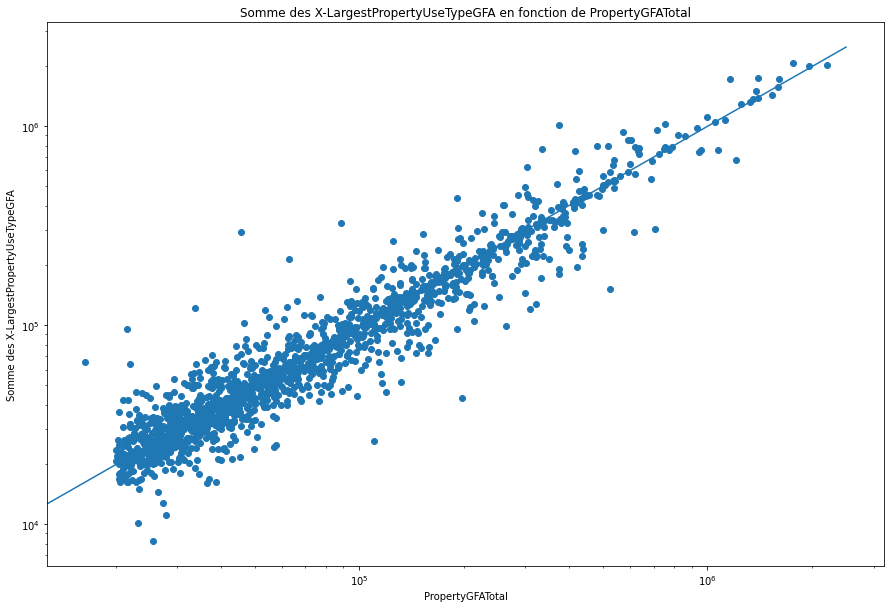

In [51]:
plt.figure(figsize=(15,10))
plt.title("Somme des X-LargestPropertyUseTypeGFA en fonction de PropertyGFATotal")
plt.scatter(diff_gfa.PropertyGFATotal, diff_gfa.LargestPropertyUseTypeGFA+diff_gfa.SecondLargestPropertyUseTypeGFA+\
           diff_gfa.ThirdLargestPropertyUseTypeGFA)
plt.xlabel("PropertyGFATotal")
plt.ylabel("Somme des X-LargestPropertyUseTypeGFA")
plt.xscale('log')
plt.yscale('log')
plt.plot([0, 2.5e6], [0, 2.5e6])
plt.show()

On décide de mettre en outlier ceux dont la surface totale est inférieur à la somme des trois GFA avec une tolérance de 10%

In [52]:
ose_2016.loc[ose_2016.PropertyGFATotal < 0.9*(ose_2016.LargestPropertyUseTypeGFA + ose_2016.SecondLargestPropertyUseTypeGFA +\
        ose_2016.ThirdLargestPropertyUseTypeGFA) , 'Outlier'] = 'Low outlier'

In [53]:
ose_2016.Outlier.value_counts()

Low outlier     426
High outlier      6
Name: Outlier, dtype: int64

On a retiré ici 10% du jeu de donnée. Cela est conséquent mais ce sont des cas qui semble assez illogique et qui pourrait nuire
à la pertinence de notre modèle.

In [54]:
stud_gfa = (diff_gfa.LargestPropertyUseTypeGFA+diff_gfa.SecondLargestPropertyUseTypeGFA+\
           diff_gfa.ThirdLargestPropertyUseTypeGFA) / diff_gfa.PropertyGFATotal

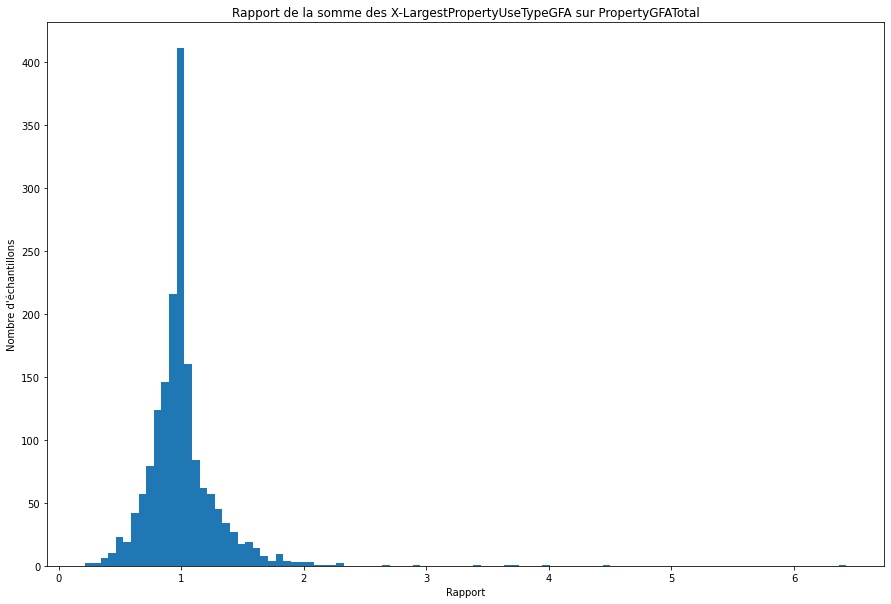

In [55]:
plt.figure(figsize=(15,10))
plt.title("Rapport de la somme des X-LargestPropertyUseTypeGFA sur PropertyGFATotal")
plt.hist(stud_gfa, bins=100)
plt.xlabel("Rapport")
plt.ylabel("Nombre d'échantillons")
plt.show()

De même, on se sépare des échantillons dont la surface totale dépasse de plus de 35% la somme des largest GFA.
En théorie, cela ne pourrait pas dépasser 25% (25/25/25 et 25 restants) et on ajoute une tolérance de 10%.

In [56]:
ose_2016.loc[ose_2016.PropertyGFATotal > 1.35*(ose_2016.LargestPropertyUseTypeGFA + ose_2016.SecondLargestPropertyUseTypeGFA +\
        ose_2016.ThirdLargestPropertyUseTypeGFA) , 'Outlier'] = 'Low outlier'

In [57]:
ose_2016.Outlier.value_counts()

Low outlier     606
High outlier      5
Name: Outlier, dtype: int64

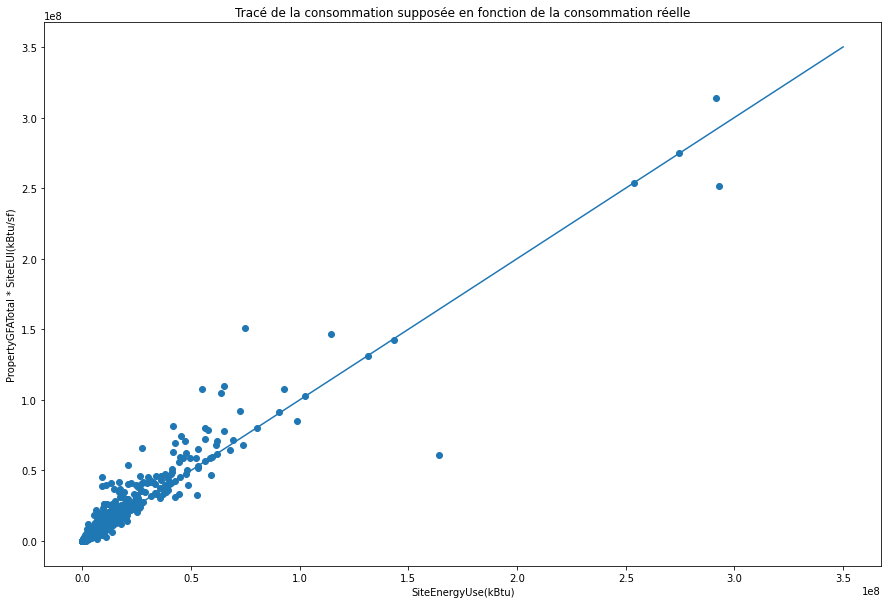

In [58]:
supp_cons = ose_2016['PropertyGFATotal'] * ose_2016['SiteEUI(kBtu/sf)']

plt.figure(figsize=(15,10))
plt.title("Tracé de la consommation supposée en fonction de la consommation réelle")
plt.scatter(ose_2016['SiteEnergyUse(kBtu)'], supp_cons)
plt.xlabel("SiteEnergyUse(kBtu)")
plt.ylabel("PropertyGFATotal * SiteEUI(kBtu/sf)")
plt.plot([0, 3.5e8], [0, 3.5e8])
plt.show()

In [59]:
ose_2016[['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']].corr()

,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu)
SiteEnergyUse(kBtu),1.000000,0.998287
SiteEnergyUseWN(kBtu),0.998287,1.000000


# Etdue bivariée

In [60]:
# On retire les outliers pour procéder à l'analyse bivariée
ose_2016 = ose_2016.loc[ose_2016.Outlier.isna()]
ose_2016.reset_index(inplace=True, drop=True)

In [61]:
ose_2016.Outlier.value_counts()

Series([], Name: Outlier, dtype: int64)

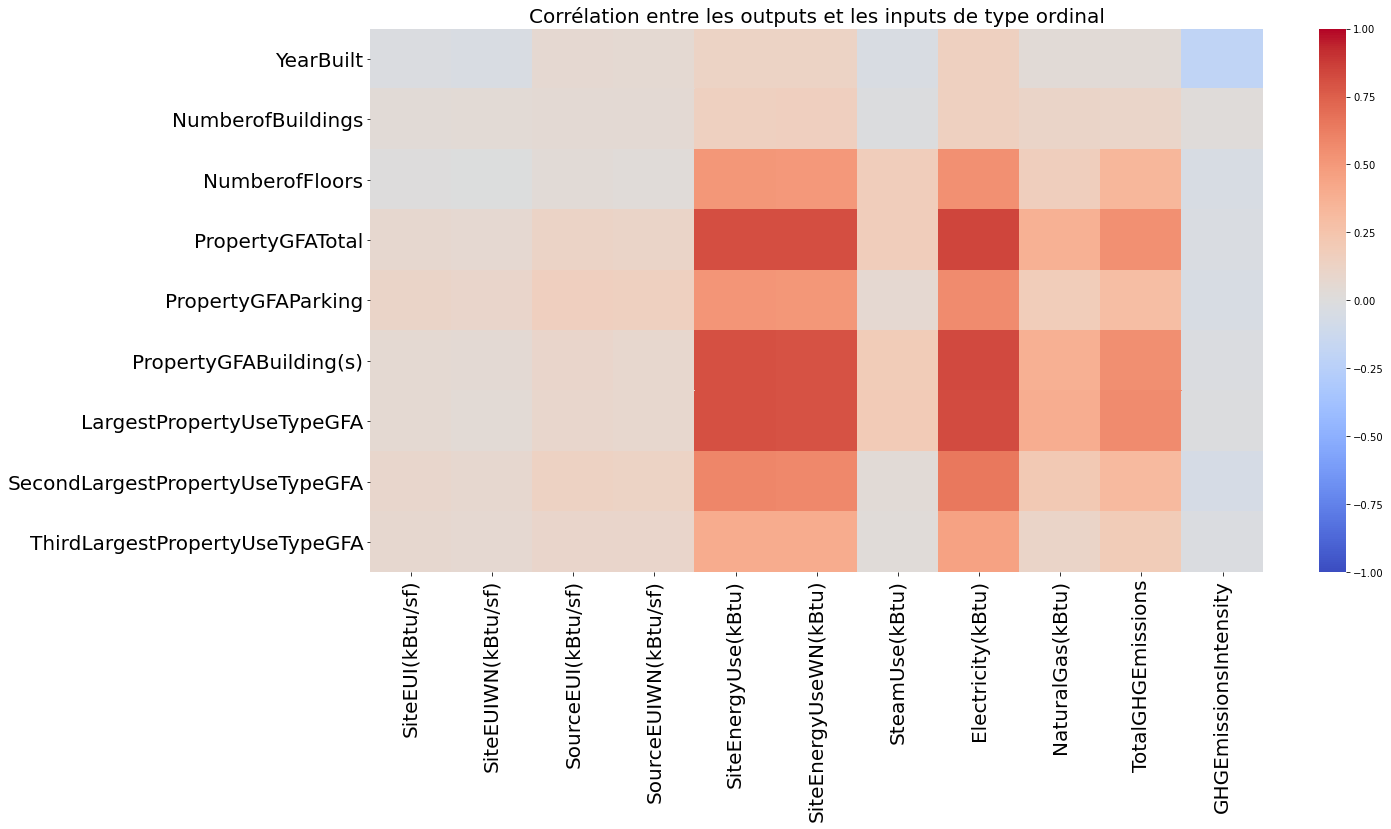

In [62]:
import seaborn as sns

hm = ose_2016.corr().loc[inputs_ordinal][outputs_ordinal]

plt.figure(figsize=(20,10))
plt.title("Corrélation entre les outputs et les inputs de type ordinal", fontsize= 20)
sns.heatmap(hm, vmin=-1, vmax=1, cmap='coolwarm')
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

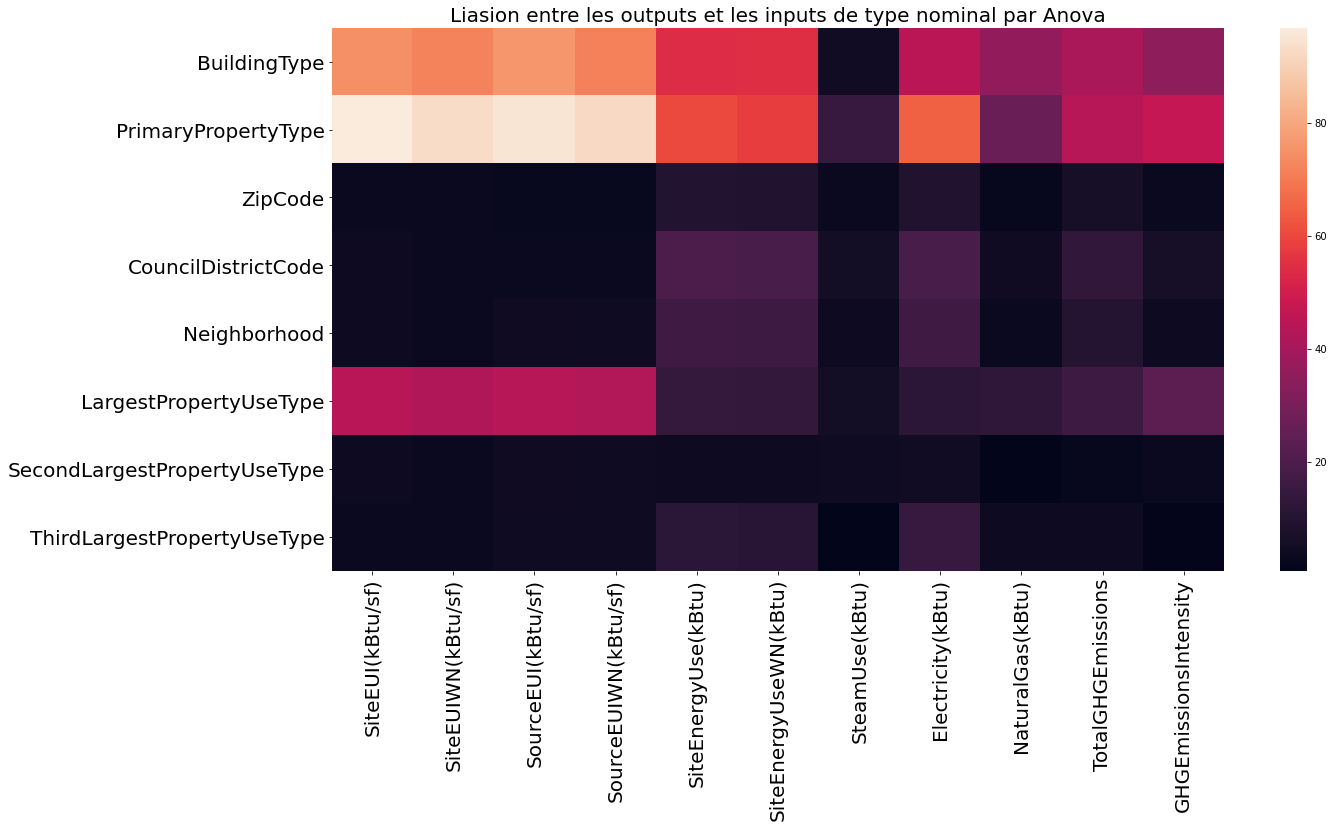

In [63]:
from sklearn.feature_selection import f_classif

a = ose_2016.dropna(subset = outputs_ordinal+inputs_nominal).copy()
f_serie = pd.DataFrame(columns = outputs_ordinal)

for col in inputs_nominal:
    res = f_classif(ose_2016[outputs_ordinal], ose_2016[col])
    f_serie.loc[col, outputs_ordinal] = res[0]
    
f_serie = f_serie.astype(np.float64)
        
plt.figure(figsize=(20,10))
plt.title("Liasion entre les outputs et les inputs de type nominal par Anova", fontsize= 20)
sns.heatmap(f_serie)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

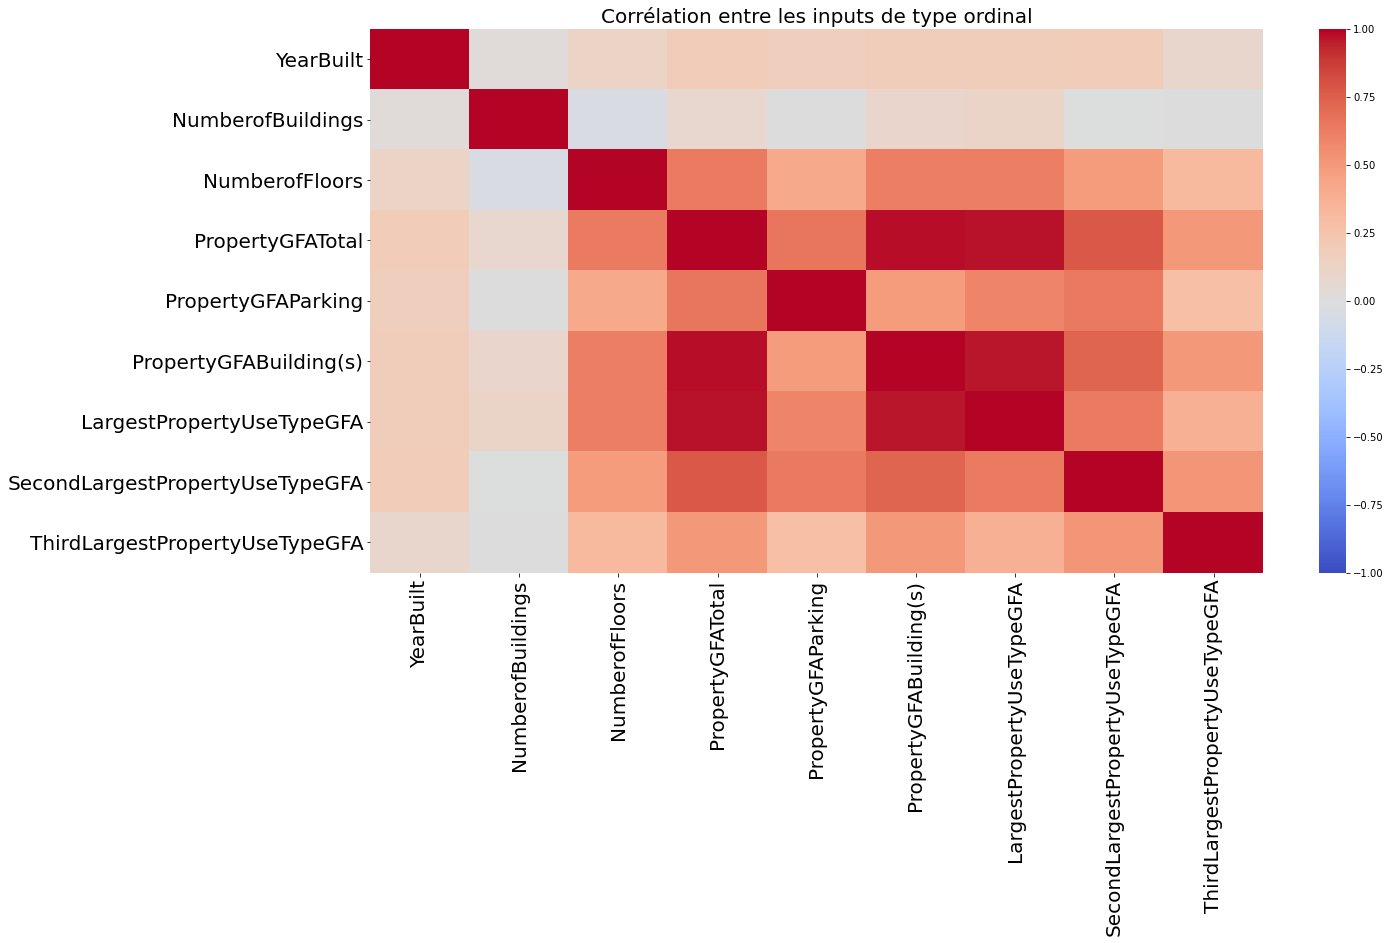

In [64]:
hm = ose_2016.corr().loc[inputs_ordinal][inputs_ordinal]

plt.figure(figsize=(20,10))
plt.title("Corrélation entre les inputs de type ordinal", fontsize= 20)
sns.heatmap(hm, vmin=-1, vmax=1, cmap='coolwarm')
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

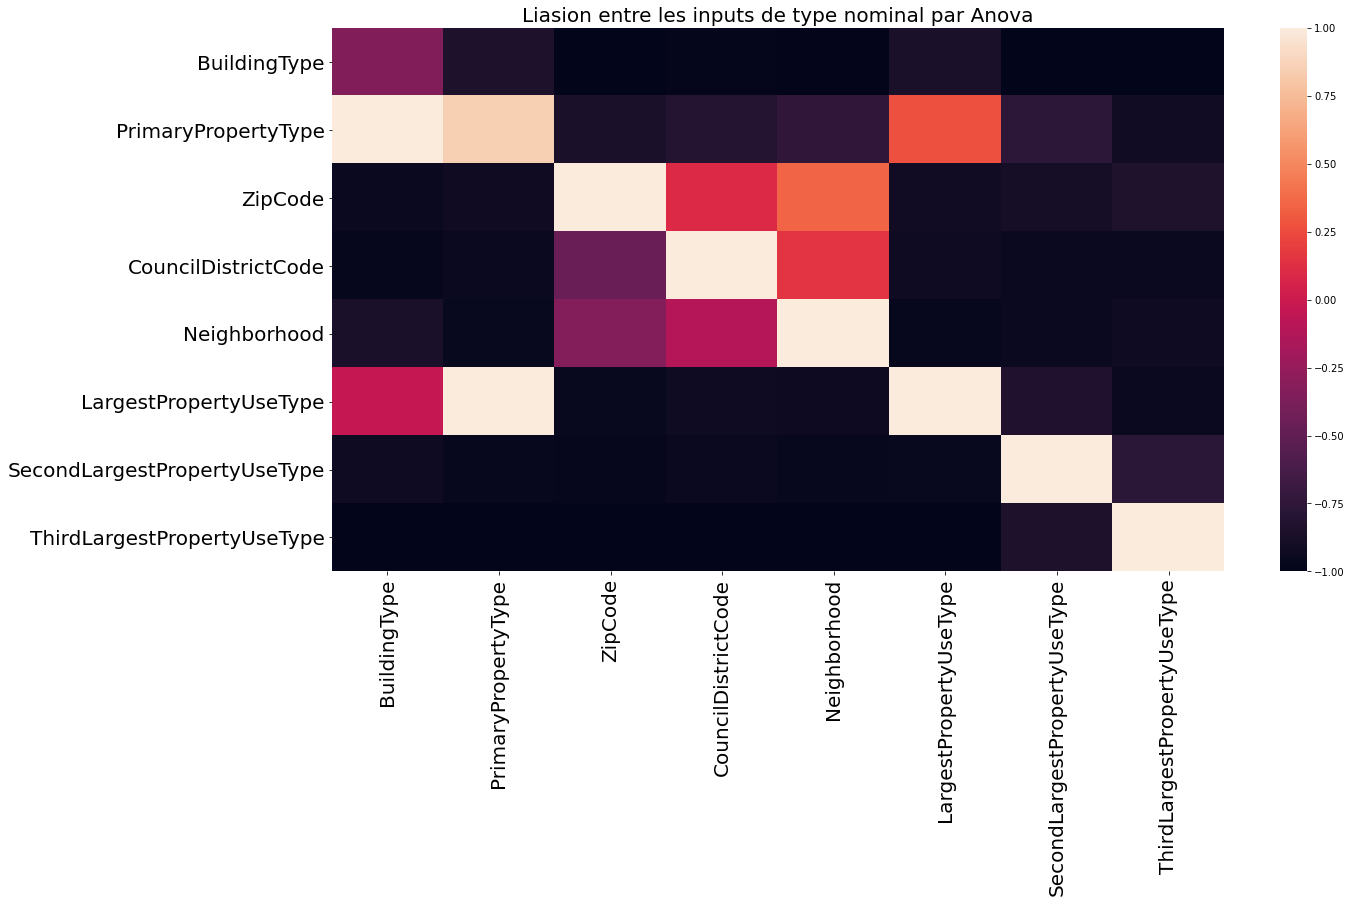

In [65]:
## VOIR SCALE

from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


encoded = pd.DataFrame(columns = inputs_nominal)
chi_df = pd.DataFrame(columns = inputs_nominal)

for col in inputs_nominal:
    encoded[col] = pd.Series(LabelEncoder().fit_transform(ose_2016[col]))
    
for col in inputs_nominal:
    chi = chi2(encoded, ose_2016[col])[0]
    chi_df[col] = chi
    
chi_df = chi_df.astype(np.float64)
chi_df = MinMaxScaler((-1,1)).fit_transform(chi_df)

chi_df = pd.DataFrame(chi_df, index=inputs_nominal, columns=inputs_nominal)

        
plt.figure(figsize=(20,10))
plt.title("Liasion entre les inputs de type nominal par Anova", fontsize= 20)
sns.heatmap(chi_df)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

In [66]:
ose_2015.to_csv('ose_2015.csv', index=False)
ose_2016.to_csv('ose_2016.csv', index=False)